In [104]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays
from google.colab import output
output.enable_custom_widget_manager()

##  Dataset:
| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|----------------------- |  
| 952             | 2                   | 1                | 65           | 271.5                  |  
| 1244            | 3                   | 2                | 64           | 232                    |  
| 1947            | 3                   | 2                | 17           | 509.8                  |  
| ...             | ...                 | ...              | ...          | ...                    |


In [105]:
# dataset
X_train = np.array([[1.24e+03, 3.00e+00, 1.00e+00, 6.40e+01], [1.95e+03, 3.00e+00, 2.00e+00, 1.70e+01], [1.72e+03, 3.00e+00, 2.00e+00, 4.20e+01], [1.96e+03, 3.00e+00, 2.00e+00, 1.50e+01], [1.31e+03, 2.00e+00, 1.00e+00, 1.40e+01], [8.64e+02, 2.00e+00, 1.00e+00, 6.60e+01], [1.84e+03, 3.00e+00, 1.00e+00, 1.70e+01], [1.03e+03, 3.00e+00, 1.00e+00, 4.30e+01], [3.19e+03, 4.00e+00, 2.00e+00, 8.70e+01], [7.88e+02, 2.00e+00, 1.00e+00, 8.00e+01], [1.20e+03, 2.00e+00, 2.00e+00, 1.70e+01], [1.56e+03, 2.00e+00, 1.00e+00, 1.80e+01], [1.43e+03, 3.00e+00, 1.00e+00, 2.00e+01], [1.22e+03, 2.00e+00, 1.00e+00, 1.50e+01], [1.09e+03, 2.00e+00, 1.00e+00, 6.40e+01], [8.48e+02, 1.00e+00, 1.00e+00, 1.70e+01], [1.68e+03, 3.00e+00, 2.00e+00, 2.30e+01], [1.77e+03, 3.00e+00, 2.00e+00, 1.80e+01], [1.04e+03, 3.00e+00, 1.00e+00, 4.40e+01], [1.65e+03, 2.00e+00, 1.00e+00, 2.10e+01], [1.09e+03, 2.00e+00, 1.00e+00, 3.50e+01], [1.32e+03, 3.00e+00, 1.00e+00, 1.40e+01], [1.59e+03, 0.00e+00, 1.00e+00, 2.00e+01], [9.72e+02, 2.00e+00, 1.00e+00, 7.30e+01], [1.10e+03, 3.00e+00, 1.00e+00, 3.70e+01], [1.00e+03, 2.00e+00, 1.00e+00, 5.10e+01], [9.04e+02, 3.00e+00, 1.00e+00, 5.50e+01], [1.69e+03, 3.00e+00, 1.00e+00, 1.30e+01], [1.07e+03, 2.00e+00, 1.00e+00, 1.00e+02], [1.42e+03, 3.00e+00, 2.00e+00, 1.90e+01], [1.16e+03, 3.00e+00, 1.00e+00, 5.20e+01], [1.94e+03, 3.00e+00, 2.00e+00, 1.20e+01], [1.22e+03, 2.00e+00, 2.00e+00, 7.40e+01], [2.48e+03, 4.00e+00, 2.00e+00, 1.60e+01], [1.20e+03, 2.00e+00, 1.00e+00, 1.80e+01], [1.84e+03, 3.00e+00, 2.00e+00, 2.00e+01], [1.85e+03, 3.00e+00, 2.00e+00, 5.70e+01], [1.66e+03, 3.00e+00, 2.00e+00, 1.90e+01], [1.10e+03, 2.00e+00, 2.00e+00, 9.70e+01], [1.78e+03, 3.00e+00, 2.00e+00, 2.80e+01], [2.03e+03, 4.00e+00, 2.00e+00, 4.50e+01], [1.78e+03, 4.00e+00, 2.00e+00, 1.07e+02], [1.07e+03, 2.00e+00, 1.00e+00, 1.00e+02], [1.55e+03, 3.00e+00, 1.00e+00, 1.60e+01], [1.95e+03, 3.00e+00, 2.00e+00, 1.60e+01], [1.22e+03, 2.00e+00, 2.00e+00, 1.20e+01], [1.62e+03, 3.00e+00, 1.00e+00, 1.60e+01], [8.16e+02, 2.00e+00, 1.00e+00, 5.80e+01], [1.35e+03, 3.00e+00, 1.00e+00, 2.10e+01], [1.57e+03, 3.00e+00, 1.00e+00, 1.40e+01], [1.49e+03, 3.00e+00, 1.00e+00, 5.70e+01], [1.51e+03, 2.00e+00, 1.00e+00, 1.60e+01], [1.10e+03, 3.00e+00, 1.00e+00, 2.70e+01], [1.76e+03, 3.00e+00, 2.00e+00, 2.40e+01], [1.21e+03, 2.00e+00, 1.00e+00, 1.40e+01], [1.47e+03, 3.00e+00, 2.00e+00, 2.40e+01], [1.77e+03, 3.00e+00, 2.00e+00, 8.40e+01], [1.65e+03, 3.00e+00, 1.00e+00, 1.90e+01], [1.03e+03, 3.00e+00, 1.00e+00, 6.00e+01], [1.12e+03, 2.00e+00, 2.00e+00, 1.60e+01], [1.15e+03, 3.00e+00, 1.00e+00, 6.20e+01], [8.16e+02, 2.00e+00, 1.00e+00, 3.90e+01], [1.04e+03, 3.00e+00, 1.00e+00, 2.50e+01], [1.39e+03, 3.00e+00, 1.00e+00, 6.40e+01], [1.60e+03, 3.00e+00, 2.00e+00, 2.90e+01], [1.22e+03, 3.00e+00, 1.00e+00, 6.30e+01], [1.07e+03, 2.00e+00, 1.00e+00, 1.00e+02], [2.60e+03, 4.00e+00, 2.00e+00, 2.20e+01], [1.43e+03, 3.00e+00, 1.00e+00, 5.90e+01], [2.09e+03, 3.00e+00, 2.00e+00, 2.60e+01], [1.79e+03, 4.00e+00, 2.00e+00, 4.90e+01], [1.48e+03, 3.00e+00, 2.00e+00, 1.60e+01], [1.04e+03, 3.00e+00, 1.00e+00, 2.50e+01], [1.43e+03, 3.00e+00, 1.00e+00, 2.20e+01], [1.16e+03, 3.00e+00, 1.00e+00, 5.30e+01], [1.55e+03, 3.00e+00, 2.00e+00, 1.20e+01], [1.98e+03, 3.00e+00, 2.00e+00, 2.20e+01], [1.06e+03, 3.00e+00, 1.00e+00, 5.30e+01], [1.18e+03, 2.00e+00, 1.00e+00, 9.90e+01], [1.36e+03, 2.00e+00, 1.00e+00, 1.70e+01], [9.60e+02, 3.00e+00, 1.00e+00, 5.10e+01], [1.46e+03, 3.00e+00, 2.00e+00, 1.60e+01], [1.45e+03, 3.00e+00, 2.00e+00, 2.50e+01], [1.21e+03, 2.00e+00, 1.00e+00, 1.50e+01], [1.55e+03, 3.00e+00, 2.00e+00, 1.60e+01], [8.82e+02, 3.00e+00, 1.00e+00, 4.90e+01], [2.03e+03, 4.00e+00, 2.00e+00, 4.50e+01], [1.04e+03, 3.00e+00, 1.00e+00, 6.20e+01], [1.62e+03, 3.00e+00, 1.00e+00, 1.60e+01], [8.03e+02, 2.00e+00, 1.00e+00, 8.00e+01], [1.43e+03, 3.00e+00, 2.00e+00, 2.10e+01], [1.66e+03, 3.00e+00, 1.00e+00, 6.10e+01], [1.54e+03, 3.00e+00, 1.00e+00, 1.60e+01], [9.48e+02, 3.00e+00, 1.00e+00, 5.30e+01], [1.22e+03, 2.00e+00, 2.00e+00, 1.20e+01], [1.43e+03, 2.00e+00, 1.00e+00, 4.30e+01], [1.66e+03, 3.00e+00, 2.00e+00, 1.90e+01], [1.21e+03, 3.00e+00, 1.00e+00, 2.00e+01], [1.05e+03, 2.00e+00, 1.00e+00, 6.50e+01]])

y_train = np.array([300., 509.8, 394., 540., 415., 230., 560., 294., 718.2, 200., 302., 468., 374.2, 388., 282., 311.8, 401., 449.8, 301., 502., 340., 400.28, 572., 264., 304., 298., 219.8, 490.7, 216.96, 368.2, 280., 526.87, 237., 562.43, 369.8, 460., 374., 390., 158., 426., 390., 277.77, 216.96, 425.8, 504., 329., 464., 220., 358., 478., 334., 426.98, 290., 463., 390.8, 354., 350., 460., 237., 288.3, 282., 249., 304., 332., 351.8, 310., 216.96, 666.34, 330., 480., 330.3, 348., 304., 384., 316., 430.4, 450., 284., 275., 414., 258., 378., 350., 412., 373., 225., 390., 267.4, 464., 174., 340., 430., 440., 216., 329., 388., 390., 356., 257.8])

X_features = ['size(sqft)','bedrooms','floors','age']

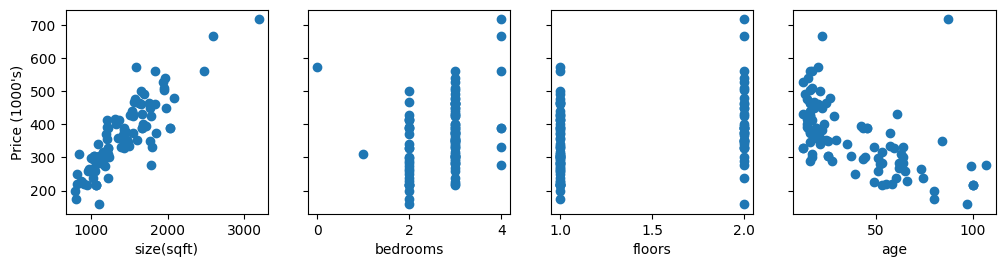

In [106]:
# Plotting each feature vs. the target, price
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
plt.subplots_adjust(bottom=0.2)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

In [107]:
def zscore_normalize_training_features(X):
    """
    computes  X, zcore normalized by column

    Args:
      X (ndarray (m,n))     : input data, m examples, n features

    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma

    return (X_norm, mu, sigma)

In [108]:
def zscore_normalize_new_features(X, mu, sigma):
    """
    computes  X, zcore normalized by column

    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      mu (ndarray (n,))     : mean of each training feature
      sigma (ndarray (n,))  : standard deviation of each training feature
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
    """
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma

    return X_norm

In [109]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

Linear regression is

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$
where $\cdot$ is a vector `dot product`,

In [110]:
def predict(x, w, b):
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters
      b (scalar):             model parameter

    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x, w) + b
    return p

In [111]:
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict(x_vec,w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [1.24e+03 3.00e+00 1.00e+00 6.40e+01]
f_wb shape (), prediction: -417.6262870205919


The equation for the cost function $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$


$\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.

In [112]:
def compute_cost(X, y, w, b):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar
    return cost

In [113]:
# Compute and display cost using our pre-chosen optimal parameters.
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 222302.2051743871


Gradient descent is computed by:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

For potential abstraction to other models like polynomial regression in the code implementation, we would add a model argument to the function, and we would also have to edit the derivatives of it appropriately, that could be computed automatically or passed precomputed as an another argument.

In [114]:
def compute_gradient_linear_regression(X, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b.
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j] #chain rule
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [115]:
#Compute and display gradient
tmp_dj_db, tmp_dj_dw = compute_gradient_linear_regression(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -59.94362409927864
dj_dw at initial w,b: 
 [ 1.45e+04 -1.02e+02  1.48e+00 -1.93e+04]


In [116]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,)) : Updated values of parameters
      b (scalar)       : Updated value of parameter
      """

    # An array to store cost J and w's at each iteration
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in #scalar has deep copy by default

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

    return w, b, J_history #return final w,b and J history

In [117]:
# normalize training features
X_norm, X_mu, X_sigma = zscore_normalize_training_features(X_train)
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 250
alpha = 1.0e-1
# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_norm, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient_linear_regression,
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

Iteration    0: Cost 57616.38   
Iteration   25: Cost   810.58   
Iteration   50: Cost   274.91   
Iteration   75: Cost   226.85   
Iteration  100: Cost   218.34   
Iteration  125: Cost   216.79   
Iteration  150: Cost   216.51   
Iteration  175: Cost   216.45   
Iteration  200: Cost   216.44   
Iteration  225: Cost   216.44   
b,w found by gradient descent: 363.16,[110.67 -21.39 -32.69 -37.86] 


In [118]:
def print_predictions(X, are_new, print_len):
  if are_new:
    X = zscore_normalize_new_features(X, X_mu, X_sigma)
  m,_ = X.shape
  for i in range(np.clip(m, 0, print_len)):
    prediction = predict(X[i], w_final, b_final)
    print(f"prediction: {prediction:0.2f}, target value: {y_train[i]}")

In [119]:
# predict training data
print_predictions(X_norm, are_new=False, print_len=10)

prediction: 294.07, target value: 300.0
prediction: 486.87, target value: 509.8
prediction: 388.28, target value: 394.0
prediction: 492.49, target value: 540.0
prediction: 419.15, target value: 415.0
prediction: 222.80, target value: 230.0
prediction: 524.50, target value: 560.0
prediction: 268.42, target value: 294.0
prediction: 684.81, target value: 718.2
prediction: 181.79, target value: 200.0


In [120]:
# predict new data
X_house = np.array([[1200, 3, 1, 40]])
print_predictions(X_house, are_new=True, print_len=1)

prediction: 318.56, target value: 300.0


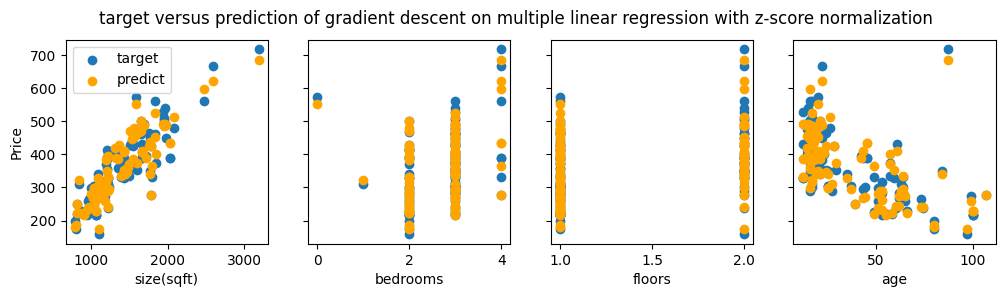

In [121]:
#predict target using normalized features
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_final) + b_final

    # plot predictions and targets versus original features
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],yp,color='orange', label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
plt.subplots_adjust(bottom=0.2)
fig.suptitle("target versus prediction of gradient descent on multiple linear regression with z-score normalization")
plt.show()

Instead of linear regreesion

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$
where $\cdot$ is a vector `dot product`,

it is polynomial regression

$$ y=w_0x_0 + w_1x_1^2 + w_2x_2^3+b $$

To still use linear regression in code, we will engineer features.

In [122]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features .
X = np.c_[x, x**2, x**3]   #<-- added engineered feature

#run model
initial_w = np.zeros((3,))
initial_b = 1.
# some gradient descent settings
iterations = 10000
alpha = 2e-7
# run gradient descent
model_w, model_b, J_hist = gradient_descent(X, y, initial_w, initial_b,
                                                  compute_cost, compute_gradient_linear_regression,
                                                  alpha, iterations)

Iteration    0: Cost  4183.41   
Iteration 1000: Cost   269.52   
Iteration 2000: Cost   196.44   
Iteration 3000: Cost   143.19   
Iteration 4000: Cost   104.39   
Iteration 5000: Cost    76.12   
Iteration 6000: Cost    55.52   
Iteration 7000: Cost    40.52   
Iteration 8000: Cost    29.58   
Iteration 9000: Cost    21.61   


Found w: [0.12 0.76 0.01]
Found b: 1.0144631044241654


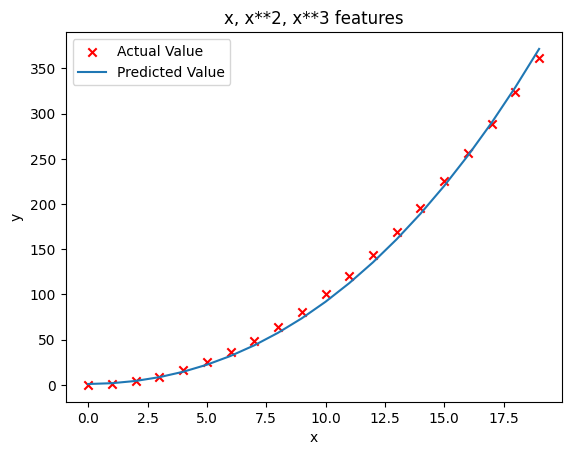

In [123]:
print(f"Found w: {model_w}")
print(f"Found b: {model_b}")
# plot results
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("x, x**2, x**3 features")
plt.plot(x, X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

Peak to Peak range by column in Raw        X:[  19  361 6859]
Peak to Peak range by column in Normalized X:[3.3  3.18 3.28]
Iteration    0: Cost  9321.84   
Iteration 10000: Cost     0.39   
Iteration 20000: Cost     0.03   
Iteration 30000: Cost     0.00   
Iteration 40000: Cost     0.00   
Iteration 50000: Cost     0.00   
Iteration 60000: Cost     0.00   
Iteration 70000: Cost     0.00   
Iteration 80000: Cost     0.00   
Iteration 90000: Cost     0.00   


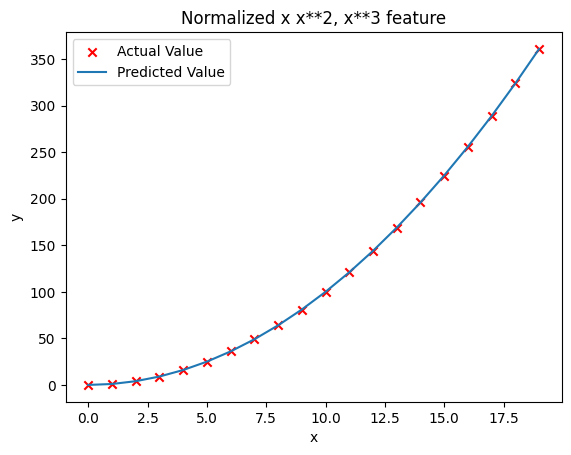

In [124]:
# normalized is faster
# create target data
y = x**2
x = np.arange(0,20,1)
X = np.c_[x, x**2, x**3]
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X,axis=0)}")

# add mean_normalization
X, X_mu, X_sigma = zscore_normalize_training_features(X)
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X,axis=0)}")

# add mean_normalization
X, mu, sigma = zscore_normalize_training_features(X)

initial_w = np.zeros((3,))
initial_b = 1.
iterations = 100000
alpha = 1e-1

model_w, model_b, J_hist = gradient_descent(X, y, initial_w, initial_b,
                                                  compute_cost, compute_gradient_linear_regression,
                                                  alpha, iterations)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

In [125]:
print(f"Found w: {model_w}")
print(f"Found b: {model_b}")

Found w: [5.27e-05 1.13e+02 8.43e-05]
Found b: 123.49999999999994


Iteration    0: Cost     0.22   
Iteration 10000: Cost     0.03   
Iteration 20000: Cost     0.02   
Iteration 30000: Cost     0.02   
Iteration 40000: Cost     0.02   
Iteration 50000: Cost     0.02   
Iteration 60000: Cost     0.02   
Iteration 70000: Cost     0.02   
Iteration 80000: Cost     0.02   
Iteration 90000: Cost     0.02   


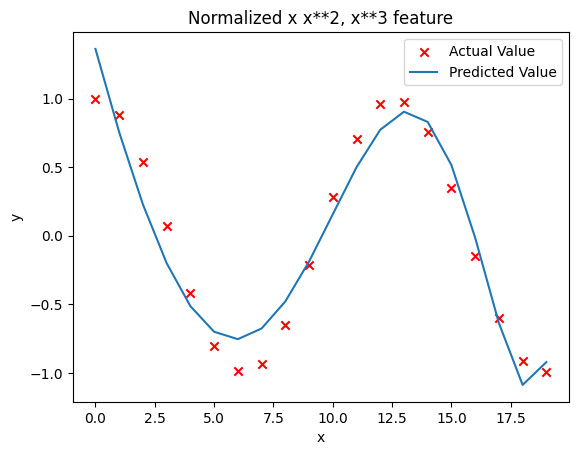

In [126]:
# complex functions, sinus

x = np.arange(0,20,1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X, X_mu, X_sigma = zscore_normalize_training_features(X)

initial_w = np.zeros((13,))
initial_b = 0.
iterations = 100000
alpha = 1e-1

model_w, model_b, J_hist = gradient_descent(X, y, initial_w, initial_b,
                                                  compute_cost, compute_gradient_linear_regression,
                                                  alpha, iterations)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()


In [127]:
print(f"Found w: {model_w}")
print(f"Found b: {model_b}")

Found w: [-3.7   3.55  6.45  0.35 -4.21 -4.99 -3.21 -0.54  1.73  2.9   2.63  0.89
 -2.22]
Found b: -0.007287194855839072


skicit-learn alternative with implementations of the algorithms

In [128]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [129]:
# dataset reminder
X_train = np.array([[1.24e+03, 3.00e+00, 1.00e+00, 6.40e+01], [1.95e+03, 3.00e+00, 2.00e+00, 1.70e+01], [1.72e+03, 3.00e+00, 2.00e+00, 4.20e+01], [1.96e+03, 3.00e+00, 2.00e+00, 1.50e+01], [1.31e+03, 2.00e+00, 1.00e+00, 1.40e+01], [8.64e+02, 2.00e+00, 1.00e+00, 6.60e+01], [1.84e+03, 3.00e+00, 1.00e+00, 1.70e+01], [1.03e+03, 3.00e+00, 1.00e+00, 4.30e+01], [3.19e+03, 4.00e+00, 2.00e+00, 8.70e+01], [7.88e+02, 2.00e+00, 1.00e+00, 8.00e+01], [1.20e+03, 2.00e+00, 2.00e+00, 1.70e+01], [1.56e+03, 2.00e+00, 1.00e+00, 1.80e+01], [1.43e+03, 3.00e+00, 1.00e+00, 2.00e+01], [1.22e+03, 2.00e+00, 1.00e+00, 1.50e+01], [1.09e+03, 2.00e+00, 1.00e+00, 6.40e+01], [8.48e+02, 1.00e+00, 1.00e+00, 1.70e+01], [1.68e+03, 3.00e+00, 2.00e+00, 2.30e+01], [1.77e+03, 3.00e+00, 2.00e+00, 1.80e+01], [1.04e+03, 3.00e+00, 1.00e+00, 4.40e+01], [1.65e+03, 2.00e+00, 1.00e+00, 2.10e+01], [1.09e+03, 2.00e+00, 1.00e+00, 3.50e+01], [1.32e+03, 3.00e+00, 1.00e+00, 1.40e+01], [1.59e+03, 0.00e+00, 1.00e+00, 2.00e+01], [9.72e+02, 2.00e+00, 1.00e+00, 7.30e+01], [1.10e+03, 3.00e+00, 1.00e+00, 3.70e+01], [1.00e+03, 2.00e+00, 1.00e+00, 5.10e+01], [9.04e+02, 3.00e+00, 1.00e+00, 5.50e+01], [1.69e+03, 3.00e+00, 1.00e+00, 1.30e+01], [1.07e+03, 2.00e+00, 1.00e+00, 1.00e+02], [1.42e+03, 3.00e+00, 2.00e+00, 1.90e+01], [1.16e+03, 3.00e+00, 1.00e+00, 5.20e+01], [1.94e+03, 3.00e+00, 2.00e+00, 1.20e+01], [1.22e+03, 2.00e+00, 2.00e+00, 7.40e+01], [2.48e+03, 4.00e+00, 2.00e+00, 1.60e+01], [1.20e+03, 2.00e+00, 1.00e+00, 1.80e+01], [1.84e+03, 3.00e+00, 2.00e+00, 2.00e+01], [1.85e+03, 3.00e+00, 2.00e+00, 5.70e+01], [1.66e+03, 3.00e+00, 2.00e+00, 1.90e+01], [1.10e+03, 2.00e+00, 2.00e+00, 9.70e+01], [1.78e+03, 3.00e+00, 2.00e+00, 2.80e+01], [2.03e+03, 4.00e+00, 2.00e+00, 4.50e+01], [1.78e+03, 4.00e+00, 2.00e+00, 1.07e+02], [1.07e+03, 2.00e+00, 1.00e+00, 1.00e+02], [1.55e+03, 3.00e+00, 1.00e+00, 1.60e+01], [1.95e+03, 3.00e+00, 2.00e+00, 1.60e+01], [1.22e+03, 2.00e+00, 2.00e+00, 1.20e+01], [1.62e+03, 3.00e+00, 1.00e+00, 1.60e+01], [8.16e+02, 2.00e+00, 1.00e+00, 5.80e+01], [1.35e+03, 3.00e+00, 1.00e+00, 2.10e+01], [1.57e+03, 3.00e+00, 1.00e+00, 1.40e+01], [1.49e+03, 3.00e+00, 1.00e+00, 5.70e+01], [1.51e+03, 2.00e+00, 1.00e+00, 1.60e+01], [1.10e+03, 3.00e+00, 1.00e+00, 2.70e+01], [1.76e+03, 3.00e+00, 2.00e+00, 2.40e+01], [1.21e+03, 2.00e+00, 1.00e+00, 1.40e+01], [1.47e+03, 3.00e+00, 2.00e+00, 2.40e+01], [1.77e+03, 3.00e+00, 2.00e+00, 8.40e+01], [1.65e+03, 3.00e+00, 1.00e+00, 1.90e+01], [1.03e+03, 3.00e+00, 1.00e+00, 6.00e+01], [1.12e+03, 2.00e+00, 2.00e+00, 1.60e+01], [1.15e+03, 3.00e+00, 1.00e+00, 6.20e+01], [8.16e+02, 2.00e+00, 1.00e+00, 3.90e+01], [1.04e+03, 3.00e+00, 1.00e+00, 2.50e+01], [1.39e+03, 3.00e+00, 1.00e+00, 6.40e+01], [1.60e+03, 3.00e+00, 2.00e+00, 2.90e+01], [1.22e+03, 3.00e+00, 1.00e+00, 6.30e+01], [1.07e+03, 2.00e+00, 1.00e+00, 1.00e+02], [2.60e+03, 4.00e+00, 2.00e+00, 2.20e+01], [1.43e+03, 3.00e+00, 1.00e+00, 5.90e+01], [2.09e+03, 3.00e+00, 2.00e+00, 2.60e+01], [1.79e+03, 4.00e+00, 2.00e+00, 4.90e+01], [1.48e+03, 3.00e+00, 2.00e+00, 1.60e+01], [1.04e+03, 3.00e+00, 1.00e+00, 2.50e+01], [1.43e+03, 3.00e+00, 1.00e+00, 2.20e+01], [1.16e+03, 3.00e+00, 1.00e+00, 5.30e+01], [1.55e+03, 3.00e+00, 2.00e+00, 1.20e+01], [1.98e+03, 3.00e+00, 2.00e+00, 2.20e+01], [1.06e+03, 3.00e+00, 1.00e+00, 5.30e+01], [1.18e+03, 2.00e+00, 1.00e+00, 9.90e+01], [1.36e+03, 2.00e+00, 1.00e+00, 1.70e+01], [9.60e+02, 3.00e+00, 1.00e+00, 5.10e+01], [1.46e+03, 3.00e+00, 2.00e+00, 1.60e+01], [1.45e+03, 3.00e+00, 2.00e+00, 2.50e+01], [1.21e+03, 2.00e+00, 1.00e+00, 1.50e+01], [1.55e+03, 3.00e+00, 2.00e+00, 1.60e+01], [8.82e+02, 3.00e+00, 1.00e+00, 4.90e+01], [2.03e+03, 4.00e+00, 2.00e+00, 4.50e+01], [1.04e+03, 3.00e+00, 1.00e+00, 6.20e+01], [1.62e+03, 3.00e+00, 1.00e+00, 1.60e+01], [8.03e+02, 2.00e+00, 1.00e+00, 8.00e+01], [1.43e+03, 3.00e+00, 2.00e+00, 2.10e+01], [1.66e+03, 3.00e+00, 1.00e+00, 6.10e+01], [1.54e+03, 3.00e+00, 1.00e+00, 1.60e+01], [9.48e+02, 3.00e+00, 1.00e+00, 5.30e+01], [1.22e+03, 2.00e+00, 2.00e+00, 1.20e+01], [1.43e+03, 2.00e+00, 1.00e+00, 4.30e+01], [1.66e+03, 3.00e+00, 2.00e+00, 1.90e+01], [1.21e+03, 3.00e+00, 1.00e+00, 2.00e+01], [1.05e+03, 2.00e+00, 1.00e+00, 6.50e+01]])

y_train = np.array([300., 509.8, 394., 540., 415., 230., 560., 294., 718.2, 200., 302., 468., 374.2, 388., 282., 311.8, 401., 449.8, 301., 502., 340., 400.28, 572., 264., 304., 298., 219.8, 490.7, 216.96, 368.2, 280., 526.87, 237., 562.43, 369.8, 460., 374., 390., 158., 426., 390., 277.77, 216.96, 425.8, 504., 329., 464., 220., 358., 478., 334., 426.98, 290., 463., 390.8, 354., 350., 460., 237., 288.3, 282., 249., 304., 332., 351.8, 310., 216.96, 666.34, 330., 480., 330.3, 348., 304., 384., 316., 430.4, 450., 284., 275., 414., 258., 378., 350., 412., 373., 225., 390., 267.4, 464., 174., 340., 430., 440., 216., 329., 388., 390., 356., 257.8])

X_features = ['size(sqft)','bedrooms','floors','age']

In [130]:
# scale/renormalize
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[2.4e+03 4.0e+00 1.0e+00 9.5e+01]
Peak to Peak range by column in Normalized X:[5.84 6.14 2.06 3.69]


In [131]:
# create and fit regression model
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 115, number of weight updates: 11386.0


In [132]:
#view parameters
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

model parameters:                   w: [110.07 -21.12 -32.37 -37.96], b:[363.15]


In [133]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b.
y_pred = np.dot(X_norm, w_norm) + b_norm
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[294.08 486.7  388.35 492.33]
Target values 
[300.  509.8 394.  540. ]


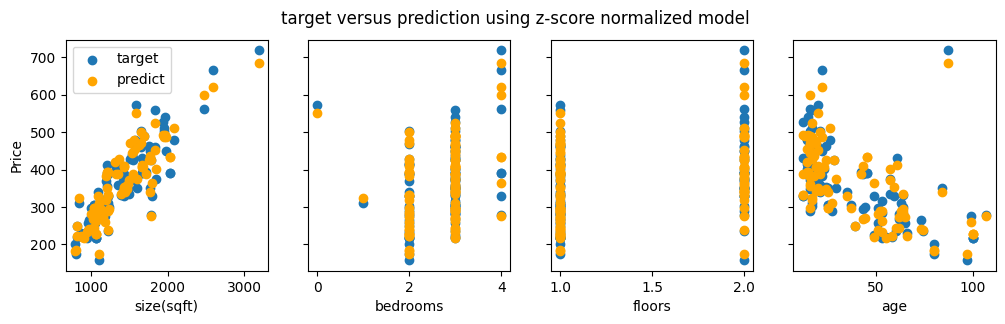

In [134]:
# plot predictions and targets vs original features
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color="orange", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()